In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
msp_mandi = pd.read_csv('msp_mandi.csv', index_col = 'year')
msp_mandi.head()

NameError: name 'pd' is not defined

In [4]:
msp_mandi = msp_mandi.iloc[:, 1:-1]
msp_mandi.head()

,commodity,Type,msprice
year,,,
2012,paddy-unhusked,Kharif Crops,1250.0
2012,rice(paddy-hus),Kharif Crops,1280.0
2012,jowar_hybrid,Kharif Crops,1500.0
2012,sorgum(jawar),Kharif Crops,1520.0
2012,bajri,Kharif Crops,1175.0


In [5]:
monthly_data = pd.read_csv('monthly_data_cleaned.csv')
monthly_data.head()

,date,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
0,2016-01,Mangalwedha,Pigeon Pea (Tur),2016,January,24,7830,8630,8260
1,2016-01,Kopargaon,Onion,2016,January,30447,428,1535,1231
2,2016-01,Newasa,Bajri,2016,January,14,1392,1450,1417
3,2016-01,Newasa,Wheat(Husked),2016,January,97,1520,1690,1615
4,2016-01,Newasa,Sorgum(Jawar),2016,January,18,1698,1698,1698


In [6]:
monthly_data['cluster'] = monthly_data.Commodity + " at " + monthly_data.APMC

In [7]:
monthly_data.head()

,date,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
0,2016-01,Mangalwedha,Pigeon Pea (Tur),2016,January,24,7830,8630,8260,Pigeon Pea (Tur) at Mangalwedha
1,2016-01,Kopargaon,Onion,2016,January,30447,428,1535,1231,Onion at Kopargaon
2,2016-01,Newasa,Bajri,2016,January,14,1392,1450,1417,Bajri at Newasa
3,2016-01,Newasa,Wheat(Husked),2016,January,97,1520,1690,1615,Wheat(Husked) at Newasa
4,2016-01,Newasa,Sorgum(Jawar),2016,January,18,1698,1698,1698,Sorgum(Jawar) at Newasa


In [8]:
relevant_data = monthly_data[["APMC","Commodity","modal_price","Year","cluster"]].groupby(["APMC","Commodity","Year",
            "cluster"],as_index=False).count().rename(columns={"modal_price":"Count"}).reset_index(drop=True)

In [9]:
relevant_data.head()

,APMC,Commodity,Year,cluster,Count
0,Aamgaon,PADDY-UNHUSKED,2016,PADDY-UNHUSKED at Aamgaon,1
1,Aamgaon,Paddy-Unhusked,2016,Paddy-Unhusked at Aamgaon,10
2,Aamgaon,Paddy-Unhusked,2018,Paddy-Unhusked at Aamgaon,12
3,Aamgaon,Paddy-Unhusked,2019,Paddy-Unhusked at Aamgaon,4
4,Aarni,Black Gram,2016,Black Gram at Aarni,2


In [10]:
relevant_data = relevant_data[relevant_data['Count'] >= 12]
relevant_data.head()

,APMC,Commodity,Year,cluster,Count
2,Aamgaon,Paddy-Unhusked,2018,Paddy-Unhusked at Aamgaon,12
374,Akhadabalapur,Soybean,2018,Soybean at Akhadabalapur,12
442,Akluj,Bitter Gourd,2018,Bitter Gourd at Akluj,12
448,Akluj,Brinjal,2018,Brinjal at Akluj,12
457,Akluj,Cabbage,2018,Cabbage at Akluj,12


In [11]:
relevant_data.shape

(981, 5)

In [12]:
clusters = relevant_data["cluster"].unique().tolist()
relevant = monthly_data[monthly_data["cluster"].isin(clusters)].reset_index(drop=True)

In [13]:
relevant = relevant.set_index('date', drop = True)
relevant.index = pd.to_datetime(relevant.index)
relevant.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
date,,,,,,,,,
2016-01-01,Kopargaon,Onion,2016,January,30447,428,1535,1231,Onion at Kopargaon
2016-01-01,Newasa,Wheat(Husked),2016,January,97,1520,1690,1615,Wheat(Husked) at Newasa
2016-01-01,Newasa-Ghodegaon,Onion,2016,January,316203,238,1762,1454,Onion at Newasa-Ghodegaon
2016-01-01,Parner,Onion,2016,January,123629,550,1820,1379,Onion at Parner
2016-01-01,Kopargaon,Soybean,2016,January,364,3032,3647,3591,Soybean at Kopargaon


Trying to find the variation coefficient in all clusters in `relevant`.

In [14]:
fluctuation_list = []
clusters = relevant_data.cluster.unique().tolist()
from scipy import stats

In [15]:
for cluster in clusters:
    working_df = relevant[relevant['cluster'] == cluster]
    variation = stats.variation(working_df.modal_price)
    fluctuation_list.append((cluster, variation))

In [16]:
fluctuation_list

[('Paddy-Unhusked at Aamgaon', 0.06619264598372922),
 ('Soybean at Akhadabalapur', 0.07160263394016735),
 ('Bitter Gourd at Akluj', 0.3155071494978347),
 ('Brinjal at Akluj', 0.32432060336769),
 ('Cabbage at Akluj', 0.37773793027027824),
 ('Chikoo at Akluj', 0.21542973308215313),
 ('Chillies(Red) at Akluj', 0.49418873826634674),
 ('Garlic at Akluj', 0.46417885914365203),
 ('Ladies Finger at Akluj', 0.3221841087710222),
 ('Maize at Akluj', 0.10945801859132055),
 ('Onion at Akluj', 0.6529715909336606),
 ('Potato at Akluj', 0.27457856576871026),
 ('Shevga at Akluj', 0.3578496993369101),
 ('Tomato at Akluj', 0.5828819677968893),
 ('Water Melon at Akluj', 0.3767712953070594),
 ('Bajri at Akole', 0.0630885657628738),
 ('Gram at Akole', 0.2570759997366725),
 ('Onion at Akole', 0.7115745588871505),
 ('Paddy-Unhusked at Akole', 0.06703431437372045),
 ('Soybean at Akole', 0.08917733593684414),
 ('Wheat(Husked) at Akole', 0.05758250964965074),
 ('Rice(Paddy-Hus) at Alibag', 0.35220803806013024),


In [17]:
variation_data = pd.DataFrame(fluctuation_list)

In [18]:
variation_data.columns = ['cluster', 'var_coeff']

In [19]:
variation_data.head()

,cluster,var_coeff
0,Paddy-Unhusked at Aamgaon,0.066193
1,Soybean at Akhadabalapur,0.071603
2,Bitter Gourd at Akluj,0.315507
3,Brinjal at Akluj,0.324321
4,Cabbage at Akluj,0.377738


In [20]:
variation_data = variation_data.sort_values(by = 'var_coeff', ascending = False)

In [21]:
variation_data.head()

,cluster,var_coeff
707,Other Vegetables at Pune-Manjri,2.426714
698,Curry Leaves at Pune-Manjri,2.404017
705,Mint at Pune-Manjri,2.358975
59,Brinjal at Barshi,1.660974
76,Tomato at Barshi,1.634244


In [22]:
variation_data = variation_data.reset_index(drop = True)

In [23]:
variation_data.head()

,cluster,var_coeff
0,Other Vegetables at Pune-Manjri,2.426714
1,Curry Leaves at Pune-Manjri,2.404017
2,Mint at Pune-Manjri,2.358975
3,Brinjal at Barshi,1.660974
4,Tomato at Barshi,1.634244


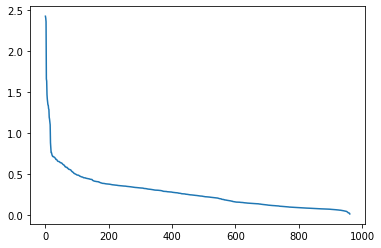

In [24]:
figure = plt.plot(variation_data.var_coeff)

In [25]:
fluctuation_clusters = variation_data.iloc[0:100, :]

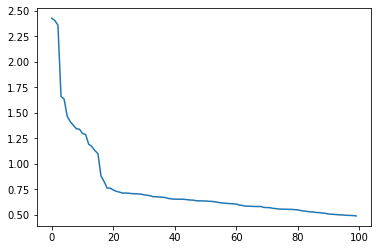

In [26]:
plt.plot(fluctuation_clusters.var_coeff)

From the zoomed-in plot, it is evident that clusters with indices less than 20 have a higher variability compared to the rest of the clusters, i.e. these clusters have data values that are more separated than the rest.

In [27]:
fluctuation_clusters = fluctuation_clusters.iloc[0:20, :]

In case of normal distribution, 3 standard deviations from the mean/median on both sides encompass ~99.7% of the data. So, using this intuition, if a price point lies beyond 3 standard deviations, it has a price fluctuation.

In [28]:
cluster_list = fluctuation_clusters.cluster.tolist()

In [29]:
cluster_list

['Other Vegetables at Pune-Manjri',
 'Curry Leaves at Pune-Manjri',
 'Mint at Pune-Manjri',
 'Brinjal at Barshi',
 'Tomato at Barshi',
 'Cabbage at Barshi',
 'Flower at Barshi',
 'Green Chilli at Barshi',
 'Cluster Bean at Barshi',
 'Lemon at Barshi',
 'Cucumber at Barshi',
 'Ambat chuka at Pune-Manjri',
 'Capsicum at Barshi',
 'Ladies Finger at Barshi',
 'Bitter Gourd at Barshi',
 'Ghosali(Bhaji) at Pune-Manjri',
 'Onion at Pune-Manjri',
 'Squash Gourd at Pune',
 'Rajgira at Pune-Manjri',
 'Onion at Lasur Station']

In [30]:
fluctuation_df = pd.DataFrame()
for cluster in cluster_list:
    span = relevant.modal_price[relevant.cluster == cluster].std()*3
    working_df = relevant[(relevant.cluster == cluster) & (relevant.modal_price > span)]
    fluctuation_df = pd.concat([fluctuation_df, working_df])

In [31]:
fluctuation_df

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,cluster
date,,,,,,,,,
2016-09-01,Pune-Manjri,Other Vegetables,2016,September,4685,1800,1800,1800,Other Vegetables at Pune-Manjri
2016-10-01,Pune-Manjri,Other Vegetables,2016,October,9517,1800,1800,1800,Other Vegetables at Pune-Manjri
2016-10-01,Barshi,Brinjal,2016,October,91,2416,4163,3574,Brinjal at Barshi
2016-07-01,Barshi,Tomato,2016,July,147,1467,2445,1924,Tomato at Barshi
2016-07-01,Barshi,Cabbage,2016,July,124,872,1486,1168,Cabbage at Barshi
2016-07-01,Barshi,Flower,2016,July,106,1019,1641,1332,Flower at Barshi
2016-07-01,Barshi,Green Chilli,2016,July,138,3055,5190,3990,Green Chilli at Barshi
2016-10-01,Barshi,Cluster Bean,2016,October,57,3095,4821,4021,Cluster Bean at Barshi
2016-09-01,Barshi,Lemon,2016,September,188,2911,4647,3858,Lemon at Barshi


In [32]:
fluctuation_df.cluster.unique().tolist()

['Other Vegetables at Pune-Manjri',
 'Brinjal at Barshi',
 'Tomato at Barshi',
 'Cabbage at Barshi',
 'Flower at Barshi',
 'Green Chilli at Barshi',
 'Cluster Bean at Barshi',
 'Lemon at Barshi',
 'Cucumber at Barshi',
 'Ambat chuka at Pune-Manjri',
 'Capsicum at Barshi',
 'Ladies Finger at Barshi',
 'Bitter Gourd at Barshi',
 'Ghosali(Bhaji) at Pune-Manjri',
 'Onion at Pune-Manjri',
 'Squash Gourd at Pune',
 'Rajgira at Pune-Manjri',
 'Onion at Lasur Station']

All these sets of APMCs and commodities have some of the highest price fluctuations.

In [33]:
fluctuation_df.to_csv('price_fluctuation_values.csv')

In [34]:
pd.DataFrame(fluctuation_df.cluster.unique().tolist()).to_csv('fluctuation_clusters.csv')